# Visualize Data

In [194]:
# Generate notebook download link
from IPython.display import FileLink
print('To download this notebook, right click on the link and Save link as...')
FileLink('tutorial_visualize.ipynb')

To download this notebook, right click on the link and Save link as...


X:\btcache\scratch\johnsonc\jupyter\Tutorial\Tutorial_GitLab\tutorial_visualize.ipynb

In [195]:
import riptable as rt
import numpy as np

In [196]:
# Display all Dataset columns -- the default max is 9.
rt.Display.options.COL_ALL = True

# Render up to 100MM before showing in scientific notation.
rt.Display.options.E_MAX = 100_000_000

# Truncate small decimals, rather than showing infinitesimal scientific notation.
rt.Display.options.P_THRESHOLD = 0

# Put commas in numbers.
rt.Display.options.NUMBER_SEPARATOR = True

# Turn on Riptable autocomplete (start typing, then press Tab to see options).
rt.autocomplete()

Riptable can work with any of the standard plotting tools, including Matplotlib, to create visualizations of your data. You can also take advantage of the plotting and HTML styling tools offered by Pandas.

In this section we'll look at a couple of simple examples using Matplotlib, Pandas, and Playa.

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

We'll use this Dataset in examples.

In [198]:
rng = np.random.default_rng(seed=42)

N = 1_000
symbols = ['IBM', 'AAPL', 'F', 'CSCO', 'SPY']
start_time = rt.DateTimeNano('20191112 09:30:00', from_tz='NYC')

ds_list = []
for symbol in symbols:
    temp_ds = rt.Dataset({'Symbol': rt.full(N, symbol),
                     'Price': 100.0 + 10 * rng.standard_normal(1) + rng.standard_normal(N).cumsum(),
                     'Size': rng.integers(1, 50, 1) + rng.integers(1, 50, N),
                     'Time': start_time + rt.TimeSpan(rng.integers(1, 100, N).cumsum(), 's'),
                    })
    ds_list.append(temp_ds)

ds = rt.hstack(ds_list)

ds = ds.sort_inplace('Time')

In [199]:
ds.sample()

#,Symbol,Price,Size,Time
0,SPY,116.09,37,20191112 10:52:19.000000000
1,IBM,93.88,33,20191112 11:07:01.000000000
2,SPY,123.20,67,20191112 11:20:23.000000000
3,F,87.20,64,20191112 12:12:19.000000000
4,F,102.82,81,20191112 13:15:46.000000000
5,CSCO,98.48,35,20191112 16:41:22.000000000
6,SPY,144.18,40,20191112 16:54:00.000000000
7,SPY,143.07,35,20191112 22:09:07.000000000
8,F,58.91,69,20191112 22:44:21.000000000
9,F,65.49,77,20191112 23:22:05.000000000


## Matplotlib Plotting

Example of a basic plot of IBM's share price.

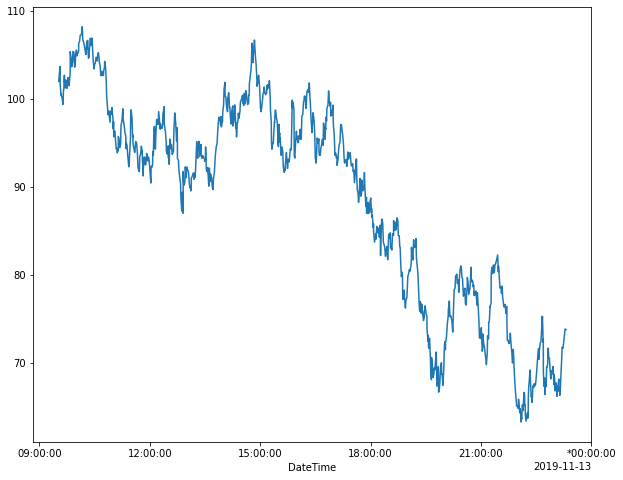

In [200]:
f = ds.Symbol=='IBM'

plt.figure(figsize=(10,8))
plt.plot(ds.Time[f], ds.Price[f])
plt.show()

And a histogram:

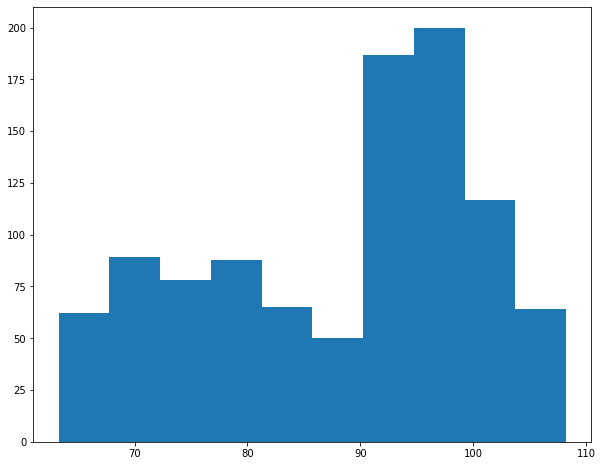

In [201]:
plt.figure(figsize=(10,8))
plt.hist(ds.Price[f])
plt.show()

And a scatter plot:

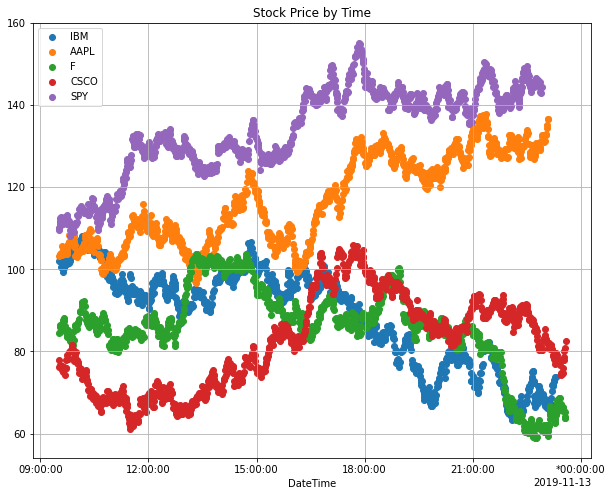

In [202]:
plt.figure(figsize=(10,8))
for symbol in symbols:
    f = ds.Symbol==symbol
    plt.scatter(ds.Time[f], ds.Price[f], label=symbol)
plt.grid()
plt.legend()
plt.title('Stock Price by Time')
plt.show()

## Pandas HTML Styling

If you want to use the Pandas Styler methods, call `to_pandas()` on your Dataset for the rendering.

In [203]:
def color_smaller_red(val):
    color = 'red' if type(val)==float and val < 100 else 'gray'
    return 'color: %s' % color

ds.to_pandas().head(10).style.applymap(color_smaller_red)

,Symbol,Price,Size,Time
0,AAPL,103.281775,63,2019-11-12 09:30:30-05:00
1,SPY,110.168266,35,2019-11-12 09:30:43-05:00
2,SPY,109.627368,37,2019-11-12 09:30:46-05:00
3,F,84.582351,58,2019-11-12 09:30:58-05:00
4,IBM,102.007187,37,2019-11-12 09:31:18-05:00
5,CSCO,77.963601,73,2019-11-12 09:31:35-05:00
6,SPY,109.972200,46,2019-11-12 09:31:36-05:00
7,CSCO,76.155438,73,2019-11-12 09:31:40-05:00
8,F,84.816947,64,2019-11-12 09:31:55-05:00
9,F,86.517740,59,2019-11-12 09:31:56-05:00


## Groupscatter Plots with Playa

Playa's `GroupScatter()` method groups data into buckets based on x-values and returns a Matplotlib plot summarizing the data.

In [204]:
from playa.plot import GroupScatter

#### Make a noisier price signal

In [205]:
ds.NoisyPrice = ds.Price + rng.normal(0, 10, ds.shape[0])

#### A regular Matplotlib scatter plot, for comparison

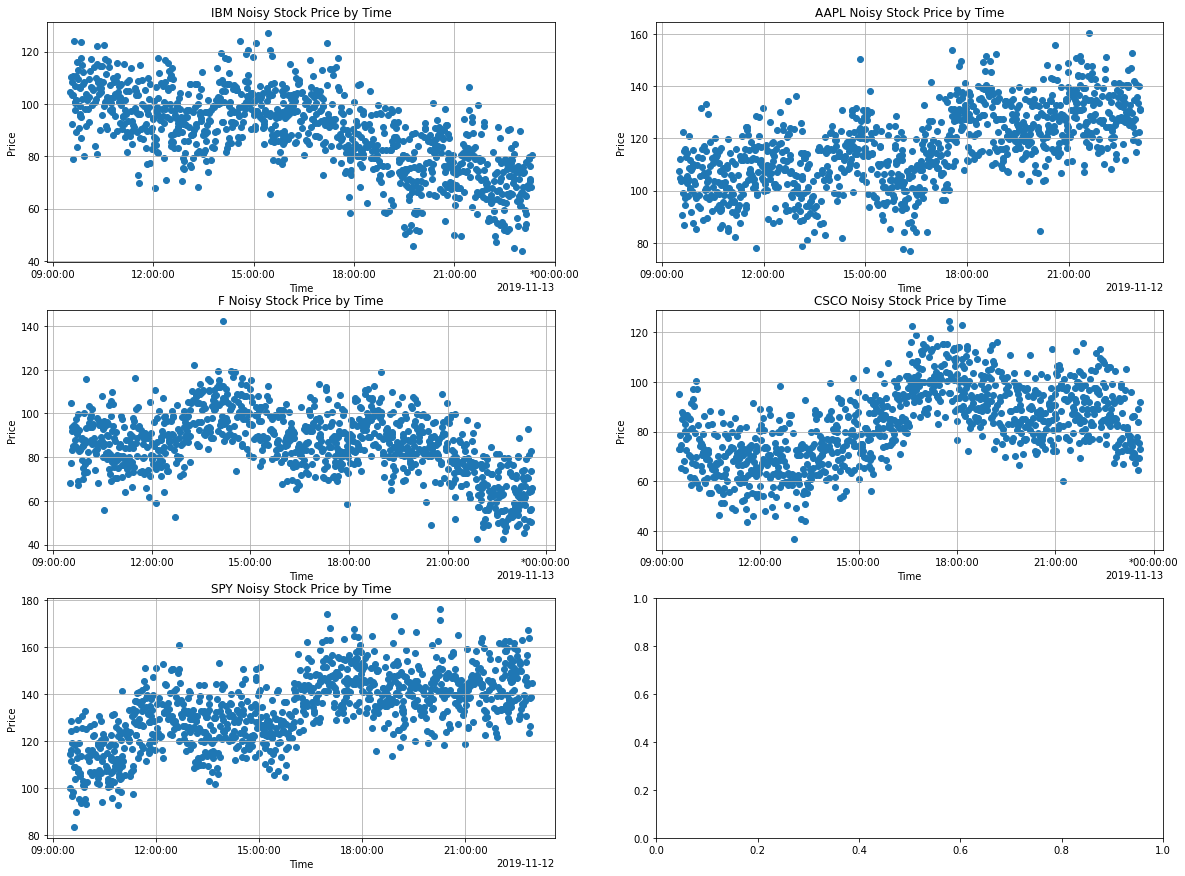

In [206]:
num_rows = int(rt.ceil(len(symbols)/2))
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
for (ax, symbol) in zip(axes.flatten(), symbols):
    f = ds.Symbol==symbol
    ax.scatter(ds.Time[f], ds.NoisyPrice[f])
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.set_title(f'{symbol} Noisy Stock Price by Time')
plt.show()

#### Now a GroupScatter for each one, you can see how it clarifies the point cloud and reveals the shape.

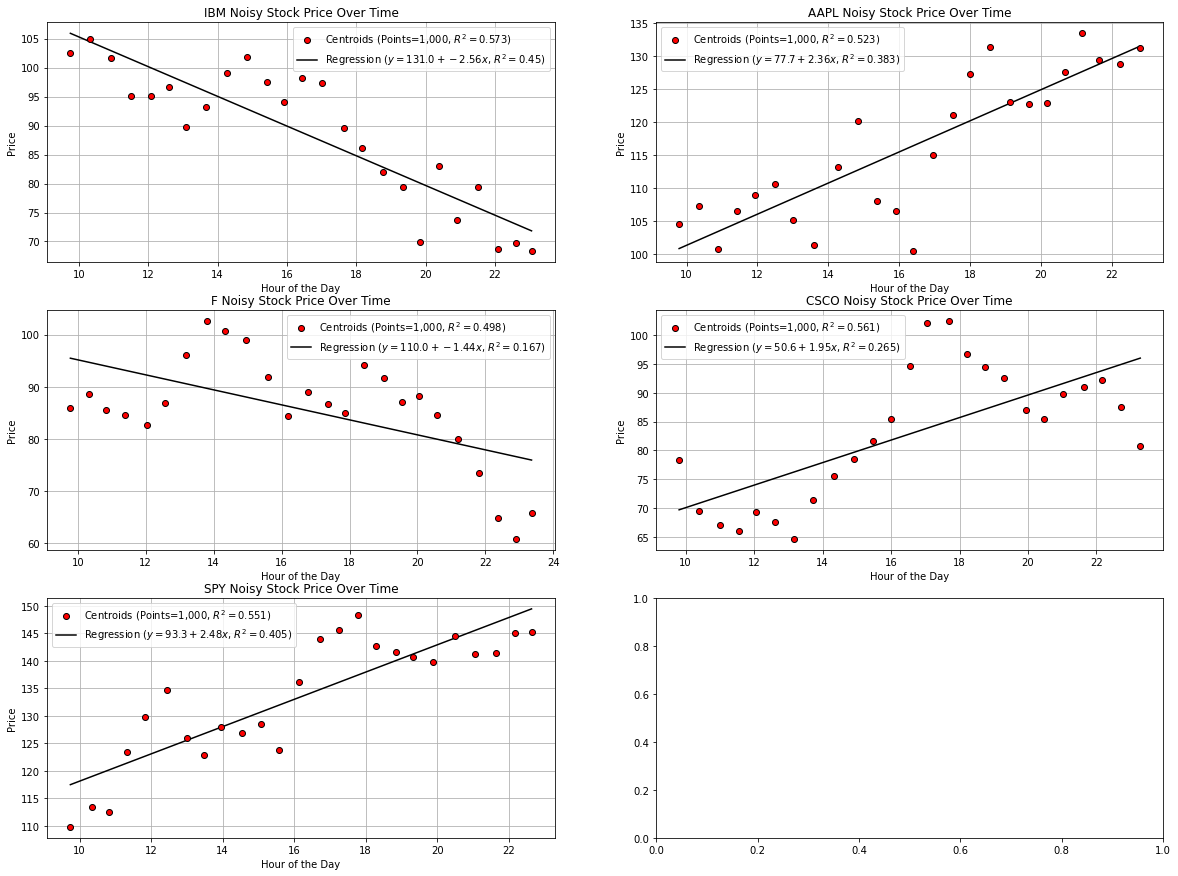

In [207]:
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
for (ax, symbol) in zip(axes.flatten(), symbols):
    f = ds.Symbol==symbol
    gs = GroupScatter(ds.Time[f].hour, ds.NoisyPrice[f])
    gs.plot(title=f'{symbol} Noisy Stock Price Over Time', x_label='Hour of the Day', y_label='Price', ax=ax)
plt.show()

This was just a brief introduction -- check out the Matpotlib, Pandas, and Playa documentation for more details and possibilities.

Next we cover useful tools for working with `NaN`s and other missing values: [Working with Missing Data](tutorial_missing_data.ipynb).

<br>
<br>

---

Questions or comments about this guide? Email RiptableDocumentation@sig.com.